In [448]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [449]:
df = pd.read_csv('real_estate_dataset.csv')
df.head(5)

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [450]:
df.describe()
df.dtypes

ID                      int64
Square_Feet           float64
Num_Bedrooms            int64
Num_Bathrooms           int64
Num_Floors              int64
Year_Built              int64
Has_Garden              int64
Has_Pool                int64
Garage_Size             int64
Location_Score        float64
Distance_to_Center    float64
Price                 float64
dtype: object

In [451]:
#VIF VALUE on NOT standardized data
X =df[['Distance_to_Center','Location_Score','Square_Feet','Num_Bedrooms','Num_Bathrooms','Num_Floors','Has_Garden','Has_Pool','Garage_Size','Year_Built']]
vif_data = pd.DataFrame()
vif_data['variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)
#vif_data.to_csv('vifdata.csv')

             variable        VIF
0  Distance_to_Center   4.690263
1      Location_Score   4.341449
2         Square_Feet   6.560269
3        Num_Bedrooms   5.287154
4       Num_Bathrooms   6.892063
5          Num_Floors   7.120720
6          Has_Garden   2.182378
7            Has_Pool   2.027469
8         Garage_Size   7.930822
9          Year_Built  40.962237


In [452]:
#NOT SCALED DATA TO SEE WHAT WRONG
reg = 'Price~Distance_to_Center+Location_Score+Square_Feet+Num_Bedrooms+Num_Bathrooms+Num_Floors+Has_Garden+Has_Pool+Garage_Size+Year_Built'
regoutput = smf.ols(reg, df).fit()
print(regoutput.summary())

#The condition number is large, 1.1e+05. This might indicate that there are
#strong multicollinearity or other numerical problems. --->> standardized data

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1987.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        02:35:40   Log-Likelihood:                -5633.8
No. Observations:                 500   AIC:                         1.129e+04
Df Residuals:                     489   BIC:                         1.134e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.897e+06   4.79

In [453]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recompute VIF on standardized data
vif_data_scaled = pd.DataFrame()
vif_data_scaled['Variable'] = X.columns
vif_data_scaled['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data_scaled)
#vif_data_scaled.to_csv('vifdata.csv')

             Variable       VIF
0  Distance_to_Center  1.039577
1      Location_Score  1.014996
2         Square_Feet  1.021886
3        Num_Bedrooms  1.012609
4       Num_Bathrooms  1.014926
5          Num_Floors  1.017003
6          Has_Garden  1.013416
7            Has_Pool  1.037009
8         Garage_Size  1.020410
9          Year_Built  1.010661


In [454]:
#predictors and dependent variable
predictors = ['Distance_to_Center', 'Location_Score', 'Square_Feet',
              'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 
              'Has_Garden', 'Has_Pool', 'Garage_Size','Year_Built']
dependent_var = 'Price'

# Standardize predictors
scaler = StandardScaler()
df_scaled = df.copy() 
df_scaled[predictors] = scaler.fit_transform(df[predictors])


reg = 'Price~Distance_to_Center+Location_Score+Square_Feet+Num_Bedrooms+Num_Bathrooms+Num_Floors+Has_Garden+Has_Pool+Garage_Size+Year_Built'
regoutput = smf.ols(reg, df_scaled).fit()


print(regoutput.summary())
out = regoutput.summary()
with open('OLS.csv', 'w') as f:
    f.write(out.as_csv())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1987.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        02:35:40   Log-Likelihood:                -5633.8
No. Observations:                 500   AIC:                         1.129e+04
Df Residuals:                     489   BIC:                         1.134e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           5.822e+05    856

(array([ 200000.,  300000.,  400000.,  500000.,  600000.,  700000.,
         800000.,  900000., 1000000.]),
 [Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000'),
  Text(0, 700000.0, '700000'),
  Text(0, 800000.0, '800000'),
  Text(0, 900000.0, '900000'),
  Text(0, 1000000.0, '1000000')])

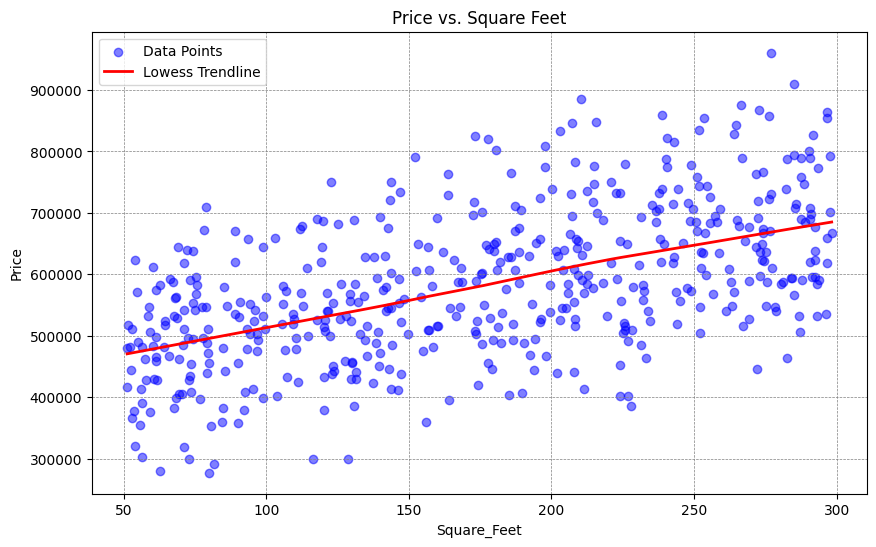

In [455]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.figure(figsize=(10, 6))
plt.scatter(df['Square_Feet'], df['Price'], alpha=0.5, color = "blue", label = 'Data Points')

lowess_smoothed = lowess(df['Price'], df['Square_Feet'], frac=0.6)
plt.plot(lowess_smoothed[:, 0],lowess_smoothed[:, 1], color = 'red', lw = 2, label = 'Lowess Trendline')

plt.title('Price vs. Square Feet', color='black')
plt.xlabel('Square_Feet', color = 'black')
plt.ylabel('Price', color = 'black')
plt.gca().set_facecolor('white')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xticks(color='black')
plt.yticks(color='black')


(array([ 200000.,  300000.,  400000.,  500000.,  600000.,  700000.,
         800000.,  900000., 1000000.]),
 [Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000'),
  Text(0, 700000.0, '700000'),
  Text(0, 800000.0, '800000'),
  Text(0, 900000.0, '900000'),
  Text(0, 1000000.0, '1000000')])

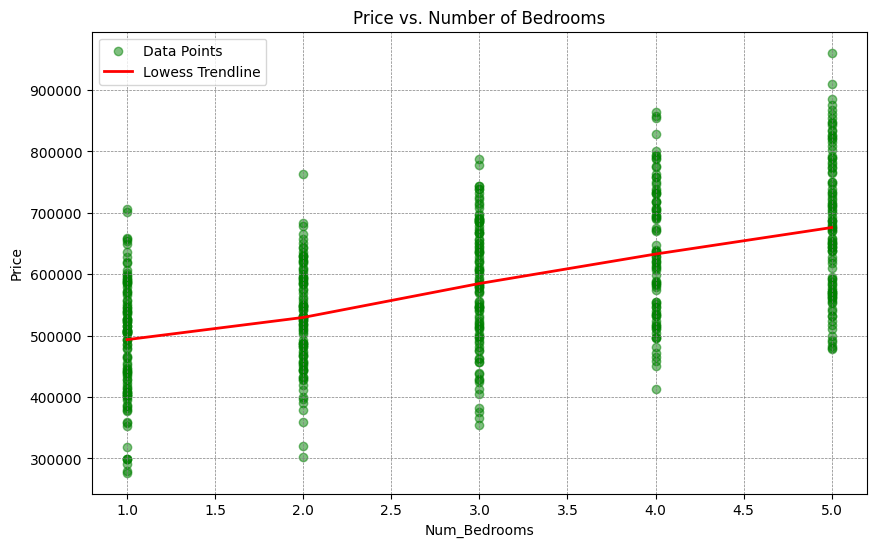

In [456]:
plt.figure(figsize=(10,6))
plt.scatter(df['Num_Bedrooms'], df['Price'], alpha=0.5,color = 'green', label = 'Data Points')
lowess_smoothed = lowess(df['Price'], df['Num_Bedrooms'], frac=0.6)
plt.plot(lowess_smoothed[:,0], lowess_smoothed[:, 1], color = 'red', lw = 2, label = 'Lowess Trendline')

plt.title('Price vs. Number of Bedrooms', color='black')
plt.xlabel('Num_Bedrooms', color = 'black')
plt.ylabel('Price', color = 'black')
plt.gca().set_facecolor('white')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.xticks(color='black')
plt.yticks(color='black')

(array([ 200000.,  300000.,  400000.,  500000.,  600000.,  700000.,
         800000.,  900000., 1000000.]),
 [Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000'),
  Text(0, 600000.0, '600000'),
  Text(0, 700000.0, '700000'),
  Text(0, 800000.0, '800000'),
  Text(0, 900000.0, '900000'),
  Text(0, 1000000.0, '1000000')])

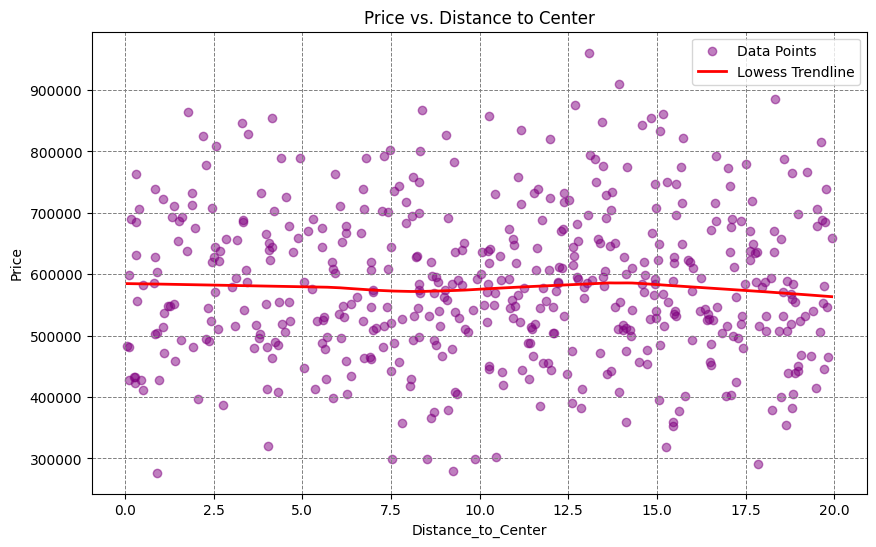

In [457]:
plt.figure(figsize=(10,6))
plt.scatter(df['Distance_to_Center'], df['Price'], alpha=0.5,color = 'purple', label = 'Data Points')
lowess_smoothed = lowess(df['Price'], df['Distance_to_Center'], frac=0.6)
plt.plot(lowess_smoothed[:,0], lowess_smoothed[:, 1], color = 'red', lw = 2, label = 'Lowess Trendline')

plt.title('Price vs. Distance to Center', color='black')
plt.xlabel('Distance_to_Center', color = 'black')
plt.ylabel('Price', color = 'black')
plt.gca().set_facecolor('white')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.7)
plt.legend()
plt.xticks(color='black')
plt.yticks(color='black')

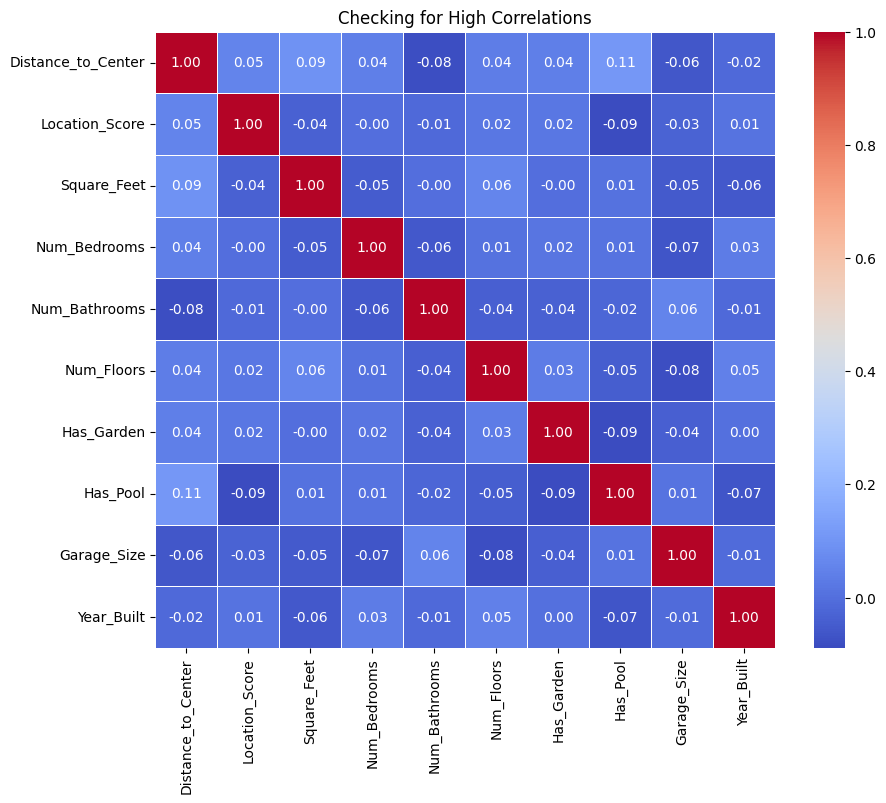

In [458]:
X = df_scaled[predictors]
correlation_matrix = X.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot= True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Checking for High Correlations')
plt.show()

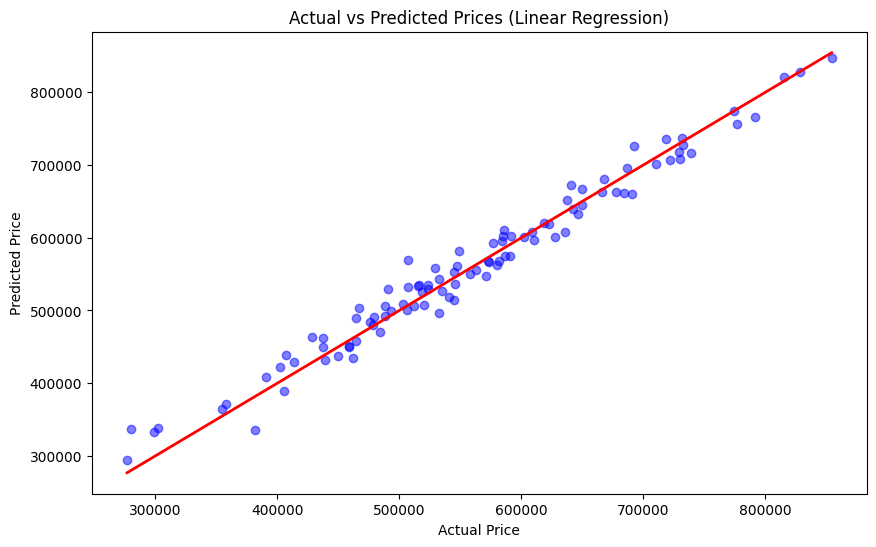

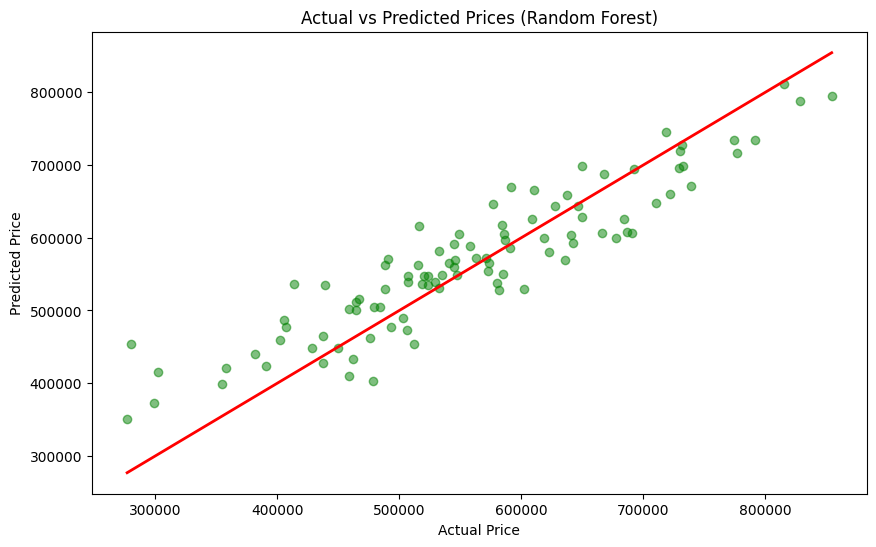

In [459]:

predictors = ['Distance_to_Center', 'Location_Score', 'Square_Feet',
              'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 
              'Has_Garden', 'Has_Pool', 'Garage_Size','Year_Built']
dependent_var = 'Price'

scaler = StandardScaler()
df_scaled = df.copy() 
df_scaled[predictors] = scaler.fit_transform(df[predictors]) 


reg = 'Price~Distance_to_Center+Location_Score+Square_Feet+Num_Bedrooms+Num_Bathrooms+Num_Floors+Has_Garden+Has_Pool+Garage_Size+Year_Built'
regoutput = smf.ols(reg, df_scaled).fit()

######
#start to ML#
######


df_scaled['Predicted_Price'] = regoutput.fittedvalues

# Splitting the data into predictors and target variable for machine learning model
X = df_scaled[predictors]
y = df_scaled['Price']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict using the trained model (only on the test set)
y_pred_rf = rf_model.predict(X_test)

# Plotting Actual vs Predicted Prices for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, df_scaled.loc[y_test.index, 'Predicted_Price'], alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Plotting Actual vs Predicted Prices for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Evaluating performance of both models
mse_lr = mean_squared_error(y_test, df_scaled.loc[y_test.index, 'Predicted_Price'])
r2_lr = r2_score(y_test, df_scaled.loc[y_test.index, 'Predicted_Price'])

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

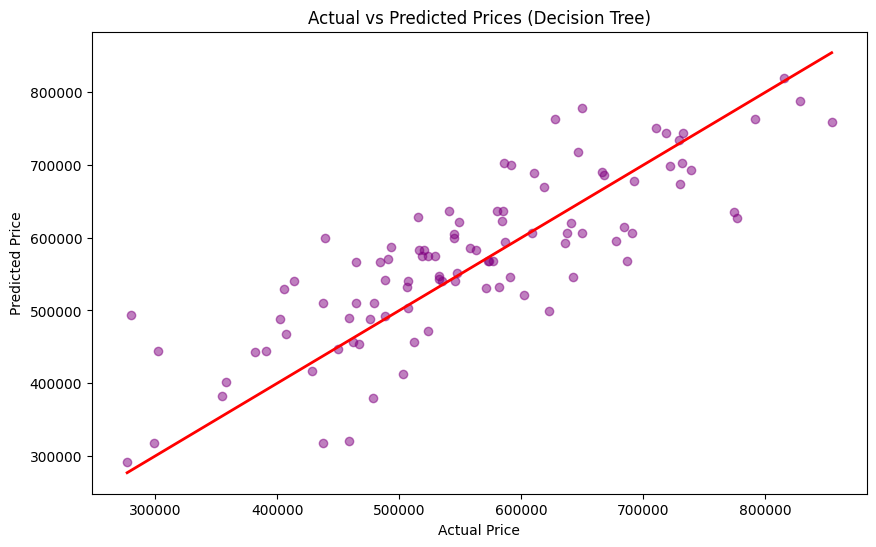

,Models,MSE,R_square
0,Linear Regression,4.095556e+08,0.972772
1,Random Forest,2.651616e+09,0.823717
2,Decision Tree,5.196442e+09,0.654534


In [460]:


# Train a Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict using the trained Decision Tree model (only on the test set)
y_pred_tree = tree_model.predict(X_test)

# Plotting Actual vs Predicted Prices for Decision Tree
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Prices (Decision Tree)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Evaluating performance of all three models
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

models = ['Linear Regression', 'Random Forest', 'Decision Tree']
MSE = [mse_lr, mse_rf, mse_tree]
R_square = [r2_lr, r2_rf, r2_tree]
result_df = pd.DataFrame({
    'Models': models,
    'MSE': MSE,
    'R_square': R_square
})
result_df
#result_df.to_csv('machinelearning.csv')


